<a href="https://colab.research.google.com/github/ramadhanu27/SKIRPSI/blob/main/Colab%201.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
# Try reading with 'latin-1' encoding and error_bad_lines=False to skip problematic lines
df = pd.read_csv('/content/dataset_tiktok-comments-scraper_2024-10-28_09-38-45-381.csv',
                 encoding='latin-1',
                 on_bad_lines='skip')  # or on_bad_lines='warn' to get warnings
# If 'latin-1' doesn't work, you may need to experiment with other encodings
# such as 'iso-8859-1', 'cp1252', etc.

df

,text
0,"ANJAY22: â¨Goods Gameplay Everytimee,â¨"
1,@ANJAY22. Congratulations broo.â¨
2,@AnJay22 â¨Thenext Masterclassâ¨
3,@ANJAY22. TheNext SuperStarsâ¨
4,sty blunder
...,...
2123,nanti jam 5 aku udh sampai ke stadion Qingdao
2124,yok bisa 3poin
2125,3-0 ayo Garuda
2126,yo bismillah 3 point


In [5]:
import pandas as pd
import re

# Fungsi untuk menghapus emoji, karakter non-Latin, dan angka dari teks
def clean_text(text):
    emoji_pattern = re.compile(
        "["u"\U0001F600-\U0001F64F" u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF" u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF" u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF" u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF" u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251" "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub('', text)             # Hapus emoji
    text = re.sub("[^\u0000-\u007F]+", '', text)   # Hapus karakter non-Latin
    text = re.sub(r'\d+', '', text)                # Hapus angka
    return text

# Membaca data dari file CSV
data = pd.read_csv("/content/dataset_tiktok-comments-scraper_2024-10-28_09-38-45-381.csv", encoding='latin-1')
data["text"] = data["text"].astype(str)

# Membersihkan data dengan fungsi clean_text, menghapus simbol, dan mengubah menjadi huruf kecil
data["text"] = data["text"].apply(clean_text)
data["text"] = data["text"].str.replace(r'[^\w\s]', '', regex=True).str.lower()

# Menghapus baris kosong
data = data[data["text"].str.strip().astype(bool)]

# Menampilkan data
print(data.to_markdown(index=False, numalign="left", stralign="left"))

# Menyimpan data kembali ke file CSV
data.to_csv("data_Cleaning.csv", index=False)


| text                                                                                                                                                                                                                                                                                                                                                                 |
|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| anjay goods gameplay everytimee                                                                                                                                                                                                                                                     

In [6]:
import pandas as pd

# File path
LEXICON_FILE_PATH = '/content/sentiwords_id.txt'

# Load lexicon from file
def load_lexicon(file_path):
    lexicon = {}
    with open(file_path, 'r') as file:
        for line in file:
            word, score = line.strip().split(':')
            lexicon[word] = int(score)
    return lexicon

# Tokenize input text
def tokenize(text):
    return text.lower().split()

# Calculate sentiment score
def calculate_sentiment(text, lexicon):
    words = tokenize(text)
    sentiment_score = 0
    for word in words:
        if word in lexicon:
            sentiment_score += lexicon[word]
    return sentiment_score

# Classify sentiment based on score
def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Main function for sentiment analysis
def sentiment_analysis(text):
    lexicon = load_lexicon(LEXICON_FILE_PATH)
    score = calculate_sentiment(text, lexicon)
    sentiment = classify_sentiment(score)
    return sentiment, score

# Example usage
data = pd.read_csv("/content/data_Cleaning.csv")

# Assuming there's a column named 'text' containing the text data
data['Sentiment'], data['Score'] = zip(*data['text'].apply(sentiment_analysis))

# Print results
print(data[['text', 'Sentiment','Score']])
data.to_csv('data_with_sentiment.csv', index=False) # Save results_df instead of data


                                              text Sentiment  Score
0                  anjay goods gameplay everytimee   Neutral      0
1                       anjay congratulations broo   Neutral      0
2                        anjay thenext masterclass   Neutral      0
3                         anjay thenext superstars   Neutral      0
4                                     sty blunder   Negative     -3
...                                            ...       ...    ...
2074  nanti jam  aku udh sampai ke stadion qingdao   Neutral      0
2075                                 yok bisa poin   Neutral      0
2076                                    ayo garuda   Neutral      0
2077                           yo bismillah  point   Neutral      0
2078                      indo menang gw botak min  Positive      4

[2079 rows x 3 columns]


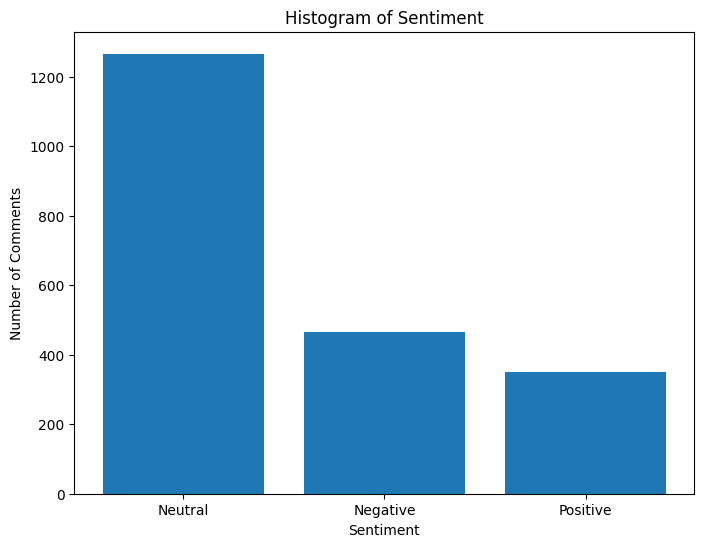

In [7]:
# prompt: berikan visualisasi histgram kolom sentimen

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data' and has a column named 'Sentiment'
# Replace 'data' with the actual name of your DataFrame if it's different

# Count the occurrences of each sentiment
sentiment_counts = data['Sentiment'].value_counts()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Histogram of Sentiment')
plt.show()

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
import numpy as np

# Baca dataset
data = pd.read_csv("/content/data_with_sentiment.csv")

# Pisahkan data menjadi teks dan label
texts = data['text']  # Ganti 'text_column' dengan nama kolom teks pada dataset
labels = data['Sentiment']  # Ganti 'sentiment_column' dengan nama kolom label sentimen pada dataset

# Fungsi untuk menghasilkan n-grams
def generate_ngrams(text, n=3):
    words = text.split()
    ngrams = [' '.join(words[i:i+n]) for i in range(len(words) - n + 1)]
    return ngrams

# Ekstraksi fitur n-gram dari teks
def extract_features(texts, n=3):
    ngram_list = []
    for text in texts:
        ngrams = generate_ngrams(text, n=n)
        ngram_list.extend(ngrams)

    # Buat kamus semua n-gram unik
    unique_ngrams = list(set(ngram_list))
    ngram_index = {ngram: i for i, ngram in enumerate(unique_ngrams)}

    # Representasikan teks sebagai vektor n-gram
    features = []
    for text in texts:
        text_ngrams = generate_ngrams(text, n=n)
        ngram_counts = Counter(text_ngrams)
        feature_vector = np.zeros(len(unique_ngrams))

        for ngram, count in ngram_counts.items():
            if ngram in ngram_index:
                feature_vector[ngram_index[ngram]] = count
        features.append(feature_vector)

    return np.array(features), unique_ngrams

# Ekstraksi fitur n-gram manual (ubah n sesuai kebutuhan, misalnya n=2 untuk bigram, n=3 untuk trigram)
n = 1  # Ganti dengan nilai n yang diinginkan
X, ngram_features = extract_features(texts, n=n)

# Split data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8677884615384616
              precision    recall  f1-score   support

    Negative       0.89      0.83      0.86        87
     Neutral       0.89      0.94      0.91       262
    Positive       0.72      0.66      0.69        67

    accuracy                           0.87       416
   macro avg       0.83      0.81      0.82       416
weighted avg       0.87      0.87      0.87       416



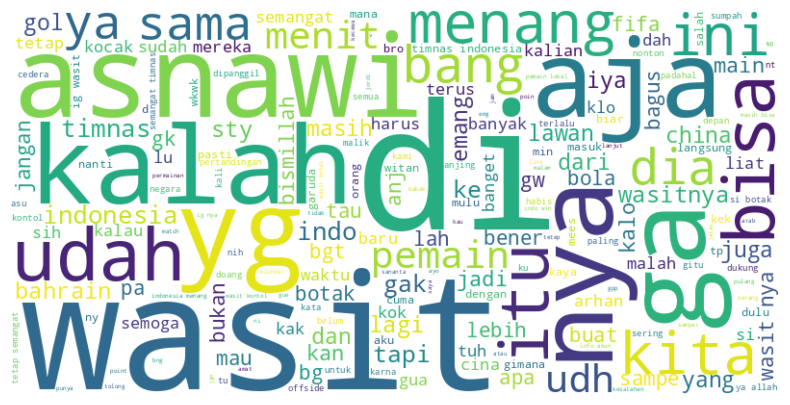

In [18]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read your data into a pandas DataFrame (replace 'your_data.csv' with your file path)
data = pd.read_csv("/content/data_Cleaning.csv") # This line reads your data file into the 'data' variable.

# Assuming 'data' DataFrame has a 'text' column containing the text data
text_data = " ".join(data['text'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()